# Data Science Project - Group 8
# Enhancing US Airline Passenger Satisfaction

### I. Business Question 
##### What are the offers that can be created for different customer groups to enhance customers and increase loyalty?

### II. Data Preparation and Exploration

**Data Overview**

The dataset contains feature related to airline passengers, including demographic details, flight information, and ratings on various aspects of their travel experience. The target variable is passenger satisfaction.

Import Python Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sklearn
import seaborn as sns

##### Data Preparation and Cleaning

Load **train** dataset and check the size of dataset

In [7]:
df = pd.read_csv('/Users/kruti/Desktop/All Folders/semester 3 /Data Science for Business prac/Project all code/train.csv')
df.shape

(103904, 25)

Check the first 10 rows of the data

In [10]:
df.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


Check columns with **null** values.

In [13]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

There are 310 missing data in the column **Arrival Delay in Minutes**.

Let's check whether there is any duplicated rows. 

In [17]:
print(f"Duplicated rows: {df.duplicated().sum()}")

Duplicated rows: 0


The columns 'unnamed: 0' and id seems to be some identifier or index column. Hence, it is unnecessary for the analysis. 
Drop the columns using the following code.

In [20]:
df_cleaned=df.drop(['Unnamed: 0','id'], axis=1)
df_cleaned.head(2)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied


In [22]:
df_cleaned.shape

(103904, 23)

The result table now has 23 columns, 2 unnecessary columns are removed. 

Now, let's check categorical column values in the dataset. 

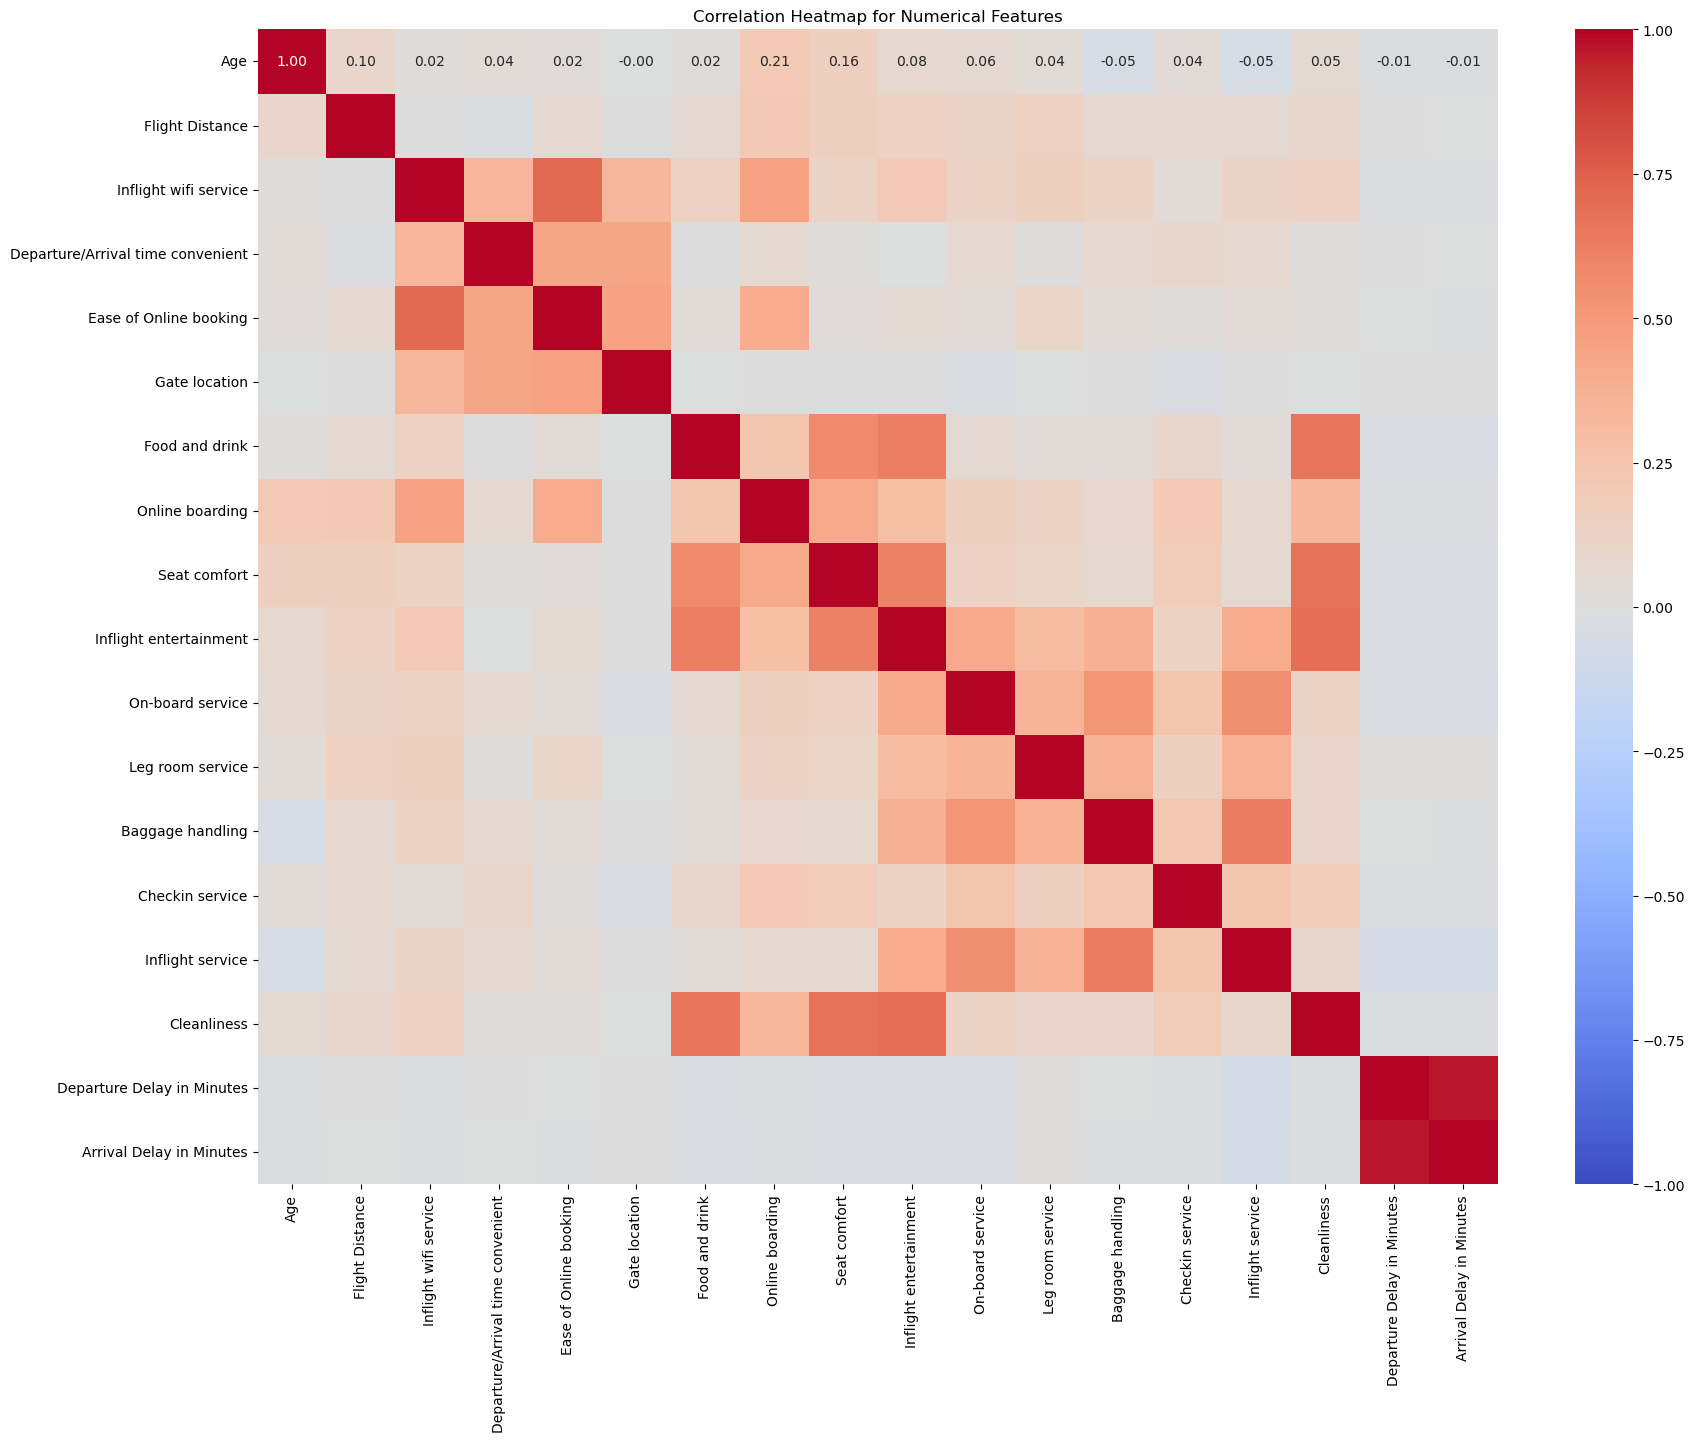

In [25]:
numeric_features = df_cleaned.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_features.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

In [27]:
corr_value = corr_matrix.loc['Departure Delay in Minutes', 'Arrival Delay in Minutes']
print(f"Correlation between Departure Delay in Minutes and Arrival Delay in Minutes: {corr_value:.3f}")

Correlation between Departure Delay in Minutes and Arrival Delay in Minutes: 0.965


In [29]:
df_cleaned = df_cleaned.drop('Arrival Delay in Minutes', axis=1)

Now, let's check categorical column values in the dataset. 

In [32]:
categorical_columns=[]
for col in df_cleaned.columns:
    if df_cleaned[col].dtype=='object':
        categorical_columns.append(col)
        print(f"Unique values of '{col}' is {df_cleaned[col].unique()}")

Unique values of 'Gender' is ['Male' 'Female']
Unique values of 'Customer Type' is ['Loyal Customer' 'disloyal Customer']
Unique values of 'Type of Travel' is ['Personal Travel' 'Business travel']
Unique values of 'Class' is ['Eco Plus' 'Business' 'Eco']
Unique values of 'satisfaction' is ['neutral or dissatisfied' 'satisfied']


The categorical columns will be encoded and the values of the column will be identified with number 0 to 2 shown in the output below. 

In [35]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df_cleaned[f"{col}_label"] = label_encoders[col].fit_transform(df[col])

In [37]:
for col in categorical_columns:
    df_group = df_cleaned[[col, f"{col}_label"]].drop_duplicates()
    print(df_group)
    print()

   Gender  Gender_label
0    Male             1
2  Female             0

       Customer Type  Customer Type_label
0     Loyal Customer                    0
1  disloyal Customer                    1

    Type of Travel  Type of Travel_label
0  Personal Travel                     1
1  Business travel                     0

      Class  Class_label
0  Eco Plus            2
1  Business            0
5       Eco            1

              satisfaction  satisfaction_label
0  neutral or dissatisfied                   0
2                satisfied                   1



For easier read, let's replace the original categorical column with the labeled ones.

In [40]:
df_cleaned.drop(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], axis=1, inplace=True)
df_cleaned.rename(columns = {'Gender_label':'Gender', 'Customer Type_label':'Customer Type', 'Type of Travel_label':'Type of Travel'
                                     ,'Class_label':'Class', 'satisfaction_label':'satisfaction'}, inplace = True)


In [42]:
df_cleaned.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Gender,Customer Type,Type of Travel,Class,satisfaction
0,13,460,3,4,3,1,5,3,5,5,...,4,4,5,5,25,1,0,1,2,0
1,25,235,3,2,3,3,1,3,1,1,...,3,1,4,1,1,1,1,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,4,4,4,5,0,0,0,0,0,1
3,25,562,2,5,5,5,2,2,2,2,...,3,1,4,2,11,0,0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,...,4,3,3,3,0,1,0,0,0,1


### Data Cleaning (Test Set)

In [45]:
df1 = pd.read_csv('/Users/kruti/Desktop/All Folders/semester 3 /Data Science for Business prac/Project all code/test.csv')
df1.shape

(25976, 25)

In [47]:
df1.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
5,5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied
6,6,79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,...,5,5,5,5,4,5,3,0,0.0,satisfied
7,7,97286,Female,Loyal Customer,43,Business travel,Business,2556,2,2,...,4,4,4,4,5,4,3,77,65.0,satisfied
8,8,27508,Male,Loyal Customer,47,Business travel,Eco,556,5,2,...,5,2,2,5,3,3,5,1,0.0,satisfied
9,9,62482,Female,Loyal Customer,46,Business travel,Business,1744,2,2,...,4,4,4,4,5,4,4,28,14.0,satisfied


In [49]:
df_cleaned_test=df1.drop(['Unnamed: 0','id'], axis=1)

In [51]:
df_cleaned_test = df_cleaned_test.drop('Arrival Delay in Minutes', axis=1)

In [53]:
df_cleaned_test

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,3,5,5,5,5,2,5,5,50,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,5,4,4,4,4,3,4,5,0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,2,4,1,3,2,2,2,0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,4,1,1,1,1,3,1,4,0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,2,4,2,4,0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,4,3,2,4,4,5,4,0,neutral or dissatisfied
25972,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,4,5,5,5,5,4,0,satisfied
25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,2,4,3,4,5,4,2,0,neutral or dissatisfied
25974,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,4,3,2,5,4,5,4,0,satisfied


In [55]:
df_cleaned_test.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
satisfaction                         0
dtype: int64

In [57]:
print(f"Duplicated rows: {df_cleaned_test.duplicated().sum()}")

Duplicated rows: 0


In [59]:
categorical_columns_1=[]
for col in df_cleaned_test.columns:
    if df_cleaned_test[col].dtype=='object':
        categorical_columns_1.append(col)
        print(f"Unique values of '{col}' is {df_cleaned_test[col].unique()}")

Unique values of 'Gender' is ['Female' 'Male']
Unique values of 'Customer Type' is ['Loyal Customer' 'disloyal Customer']
Unique values of 'Type of Travel' is ['Business travel' 'Personal Travel']
Unique values of 'Class' is ['Eco' 'Business' 'Eco Plus']
Unique values of 'satisfaction' is ['satisfied' 'neutral or dissatisfied']


In [61]:
label_encoders_1 = {}
for col in categorical_columns_1:
    label_encoders_1[col] = LabelEncoder()
    df_cleaned_test[f"{col}_label"] = label_encoders_1[col].fit_transform(df_cleaned_test[col])

In [63]:
df_cleaned_test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction,Gender_label,Customer Type_label,Type of Travel_label,Class_label,satisfaction_label
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,2,5,5,50,satisfied,0,0,0,1,1
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,3,4,5,0,satisfied,0,0,0,0,1
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,2,2,0,neutral or dissatisfied,1,1,0,1,0
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,3,1,4,0,satisfied,1,0,0,0,1
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,4,2,4,0,satisfied,0,0,0,1,1


In [65]:
for col in categorical_columns_1:
    df_group_1 = df_cleaned_test[[col, f"{col}_label"]].drop_duplicates()
    print(df_group_1)
    print()

   Gender  Gender_label
0  Female             0
2    Male             1

       Customer Type  Customer Type_label
0     Loyal Customer                    0
2  disloyal Customer                    1

     Type of Travel  Type of Travel_label
0   Business travel                     0
15  Personal Travel                     1

       Class  Class_label
0        Eco            1
1   Business            0
17  Eco Plus            2

              satisfaction  satisfaction_label
0                satisfied                   1
2  neutral or dissatisfied                   0



In [67]:
df_cleaned_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Gender                             25976 non-null  object
 1   Customer Type                      25976 non-null  object
 2   Age                                25976 non-null  int64 
 3   Type of Travel                     25976 non-null  object
 4   Class                              25976 non-null  object
 5   Flight Distance                    25976 non-null  int64 
 6   Inflight wifi service              25976 non-null  int64 
 7   Departure/Arrival time convenient  25976 non-null  int64 
 8   Ease of Online booking             25976 non-null  int64 
 9   Gate location                      25976 non-null  int64 
 10  Food and drink                     25976 non-null  int64 
 11  Online boarding                    25976 non-null  int64 
 12  Seat

In [69]:
df_cleaned_test.drop(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], axis=1, inplace=True)
df_cleaned_test.rename(columns = {'Gender_label':'Gender', 'Customer Type_label':'Customer Type', 'Type of Travel_label':'Type of Travel'
                                     ,'Class_label':'Class', 'satisfaction_label':'satisfaction'}, inplace = True)

In [71]:
df_cleaned_test.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Gender,Customer Type,Type of Travel,Class,satisfaction
0,52,160,5,4,3,4,3,4,3,5,...,5,2,5,5,50,0,0,0,1,1
1,36,2863,1,1,3,1,5,4,5,4,...,4,3,4,5,0,0,0,0,0,1
2,20,192,2,0,2,4,2,2,2,2,...,3,2,2,2,0,1,1,0,1,0
3,44,3377,0,0,0,2,3,4,4,1,...,1,3,1,4,0,1,0,0,0,1
4,49,1182,2,3,4,3,4,1,2,2,...,2,4,2,4,0,0,0,0,1,1


### III. Data Science Task

After the exploratory data analysis, now we will conduct data science task. 

### 1.Decison Tree Model

In [246]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [248]:
# Separate features and target
X_train = df_cleaned.drop('satisfaction', axis=1)
y_train = df_cleaned['satisfaction']
X_test = df_cleaned_test.drop('satisfaction', axis=1)
y_test = df_cleaned_test['satisfaction']

class_labels = np.unique(y_train)
print(class_labels)

[0 1]


In [250]:
# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'max_depth': [5, 10, 20, None],
    'max_features': [None, 'sqrt', 'log2'],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Perform Randomized Search with cross-validation and stratification
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, n_jobs=-1, scoring='accuracy')
random_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", random_search.best_params_)


Best parameters found:  {'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 20, 'criterion': 'gini'}


In [252]:
# Train the model with the best parameters
best_clf = random_search.best_estimator_
best_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_clf.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[14144   429]
 [  740 10663]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14573
           1       0.96      0.94      0.95     11403

    accuracy                           0.95     25976
   macro avg       0.96      0.95      0.95     25976
weighted avg       0.96      0.95      0.95     25976


Accuracy Score:
0.9549969202340622


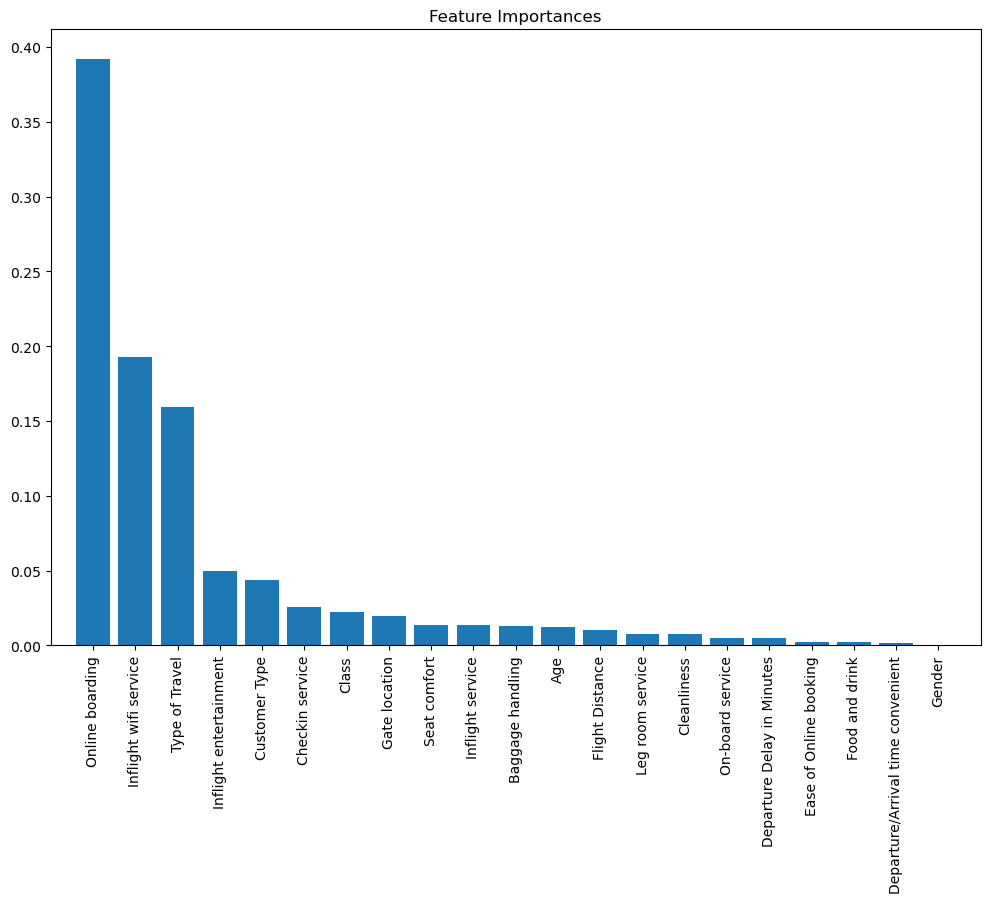

Feature Importances:
Online boarding: 0.39212842098667317
Inflight wifi service: 0.1924759591300998
Type of Travel: 0.1591156605404018
Inflight entertainment: 0.0494344553712269
Customer Type: 0.04393715437788738
Checkin service: 0.025818561901722256
Class: 0.022369252451200257
Gate location: 0.019764430079185758
Seat comfort: 0.013950007109353063
Inflight service: 0.01380585099973446
Baggage handling: 0.012657476806976601
Age: 0.012222619242952159
Flight Distance: 0.010556750624064946
Leg room service: 0.00790941081788441
Cleanliness: 0.007571084897273737
On-board service: 0.004927290425012667
Departure Delay in Minutes: 0.004810970960744383
Ease of Online booking: 0.00221678088507515
Food and drink: 0.0020648175442167563
Departure/Arrival time convenient: 0.0018242754470797222
Gender: 0.0004387694012345296


In [255]:
# Plot feature importances
importances = best_clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns

plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), features[indices], rotation=90)
plt.xlim([-1, len(importances)])
plt.show()

print("Feature Importances:")
for i in range(len(features)):
    print(f"{features[indices[i]]}: {importances[indices[i]]}")

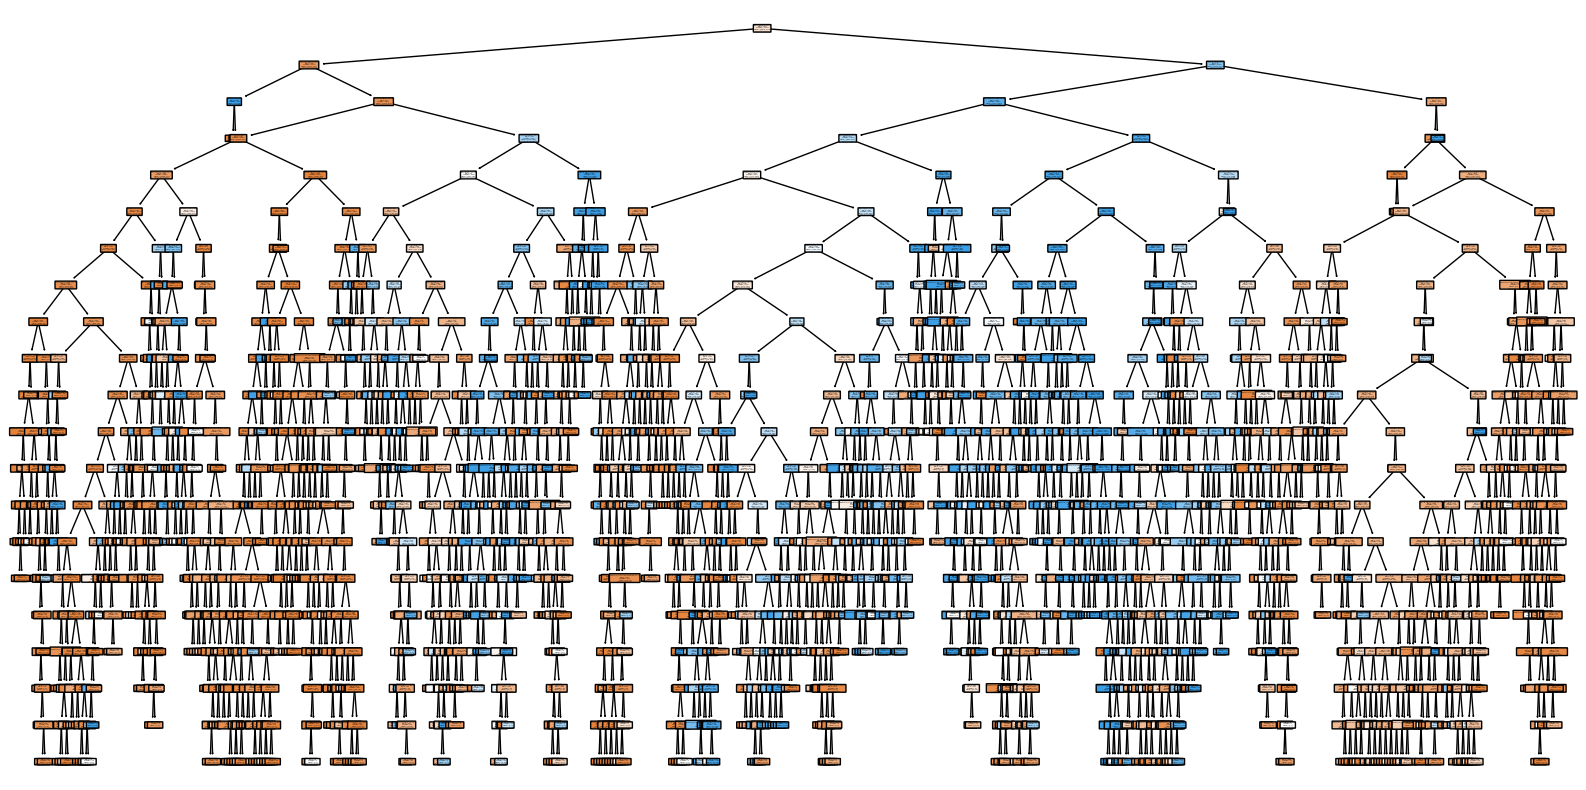

In [257]:
plt.figure(figsize=(20, 10))
plot_tree(best_clf, filled=True, feature_names=list(features), class_names=['Not Satisfied', 'Satisfied'], rounded=True)
plt.show()

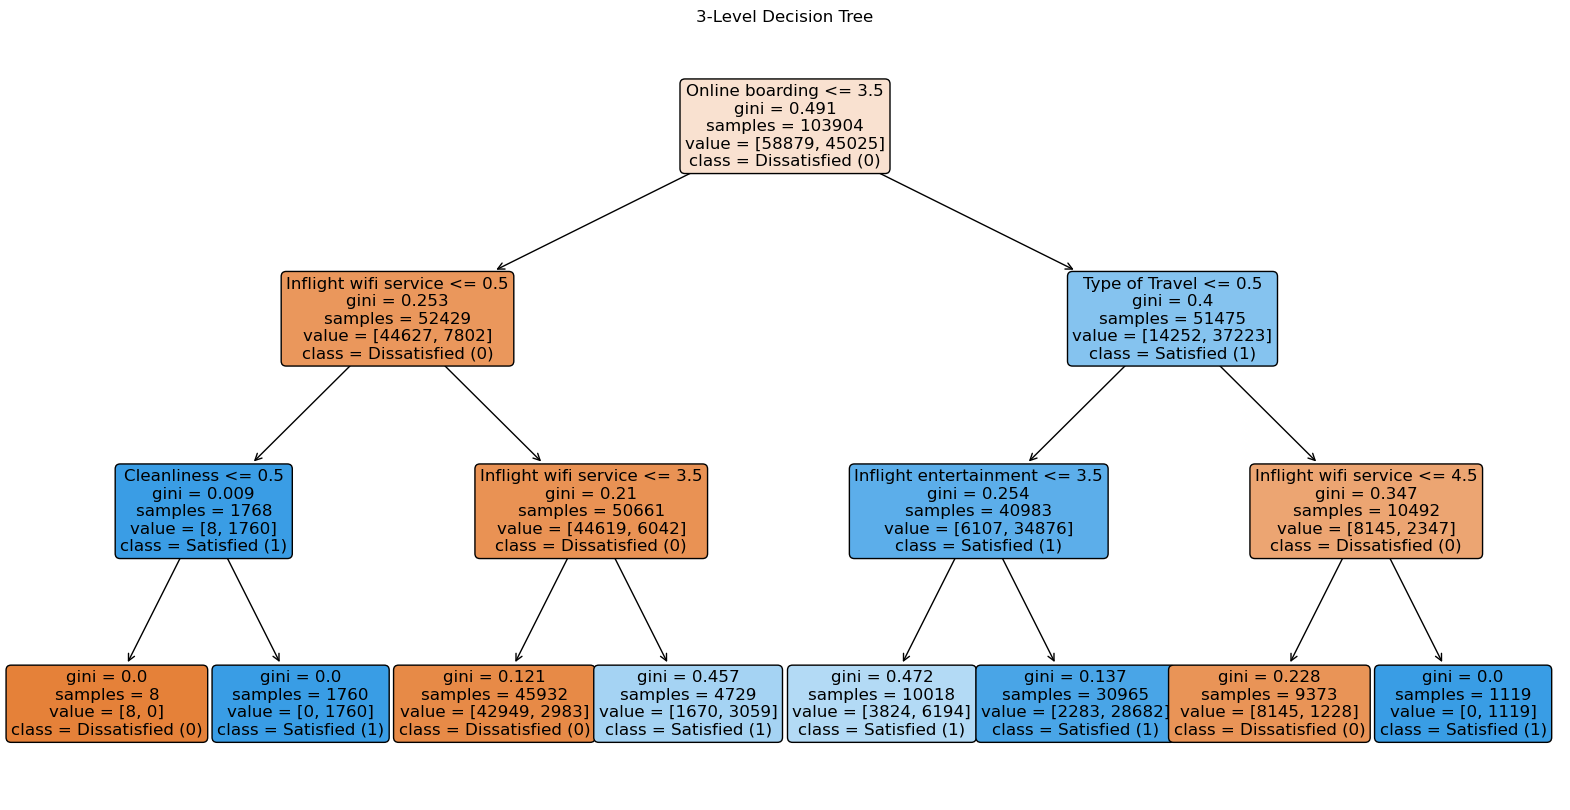

In [259]:
# build tree with only three levels to see visualize most important splits
clf_3 = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_fit = clf_3.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(clf_fit, 
          feature_names=list(features), 
          class_names=['Dissatisfied (0)', 'Satisfied (1)'],
          filled=True, 
          rounded=True,
          fontsize=12)
plt.title("3-Level Decision Tree")
plt.show()

In [261]:
wifi_labels = {
    0: 'No wifi service',
    1: 'Very Poor',
    2: 'Poor',
    3: 'Neutral',
    4: 'Good',
    5: 'Excellent'
}

# Replace numerical levels with descriptive labels
df_cleaned['Inflight wifi service'] = df_cleaned['Inflight wifi service'].map(wifi_labels)

satisfaction_summary_by_Inflight_wifi_service = df_cleaned.groupby('Inflight wifi service')['satisfaction'].value_counts()

# Print the result
print("Number of customers satisfied and not satisfied out for each Inflight wifi service type:")
print(satisfaction_summary_by_Inflight_wifi_service)

Number of customers satisfied and not satisfied out for each Inflight wifi service type:
Inflight wifi service  satisfaction
Excellent              1               11363
                       0                 106
Good                   1               11856
                       0                7938
Neutral                0               19386
                       1                6482
No wifi service        1                3095
                       0                   8
Poor                   0               19407
                       1                6423
Very Poor              0               12034
                       1                5806
Name: count, dtype: int64


In [263]:
boarding_labels = {
    0: 'Not Available(Online boarding option not offered)',
    1: 'Complex(Customers encounter multiple steps or technical issues)',
    2: 'Average(Customers face some minor challenges but can proceed)',
    3: 'Typical(Customers go through the typical online boarding process)',
    4: 'Smooth(Customers experience a streamlined and efficient process)',
    5: 'Seamless(Online boarding is effortless and highly user-friendly) '
}

# Replace numerical levels with descriptive labels
df_cleaned['Online boarding'] = df_cleaned['Online boarding'].map(boarding_labels)

satisfaction_summary_by_Online_boarding = df_cleaned.groupby('Online boarding')['satisfaction'].value_counts()

# Print the result
print("Number of customers satisfied and not satisfied out for each Online boarding type:")
print(satisfaction_summary_by_Online_boarding)

Number of customers satisfied and not satisfied out for each Online boarding type:
Online boarding                                                    satisfaction
Average(Customers face some minor challenges but can proceed)      0               15486
                                                                   1                2019
Complex(Customers encounter multiple steps or technical issues)    0                9219
                                                                   1                1473
Not Available(Online boarding option not offered)                  1                1351
                                                                   0                1077
Seamless(Online boarding is effortless and highly user-friendly)   1               18057
                                                                   0                2656
Smooth(Customers experience a streamlined and efficient process)   1               19166
                                    

In [265]:
satisfaction_summary_by_Type_of_Travel = df_cleaned.groupby('Type of Travel')['satisfaction'].value_counts()

# Print the result
print("Number of customers satisfied and not satisfied out for each Type of Travel type:")
print(satisfaction_summary_by_Type_of_Travel)

Number of customers satisfied and not satisfied out for each Type of Travel type:
Type of Travel  satisfaction
0               1               41746
                0               29909
1               0               28970
                1                3279
Name: count, dtype: int64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


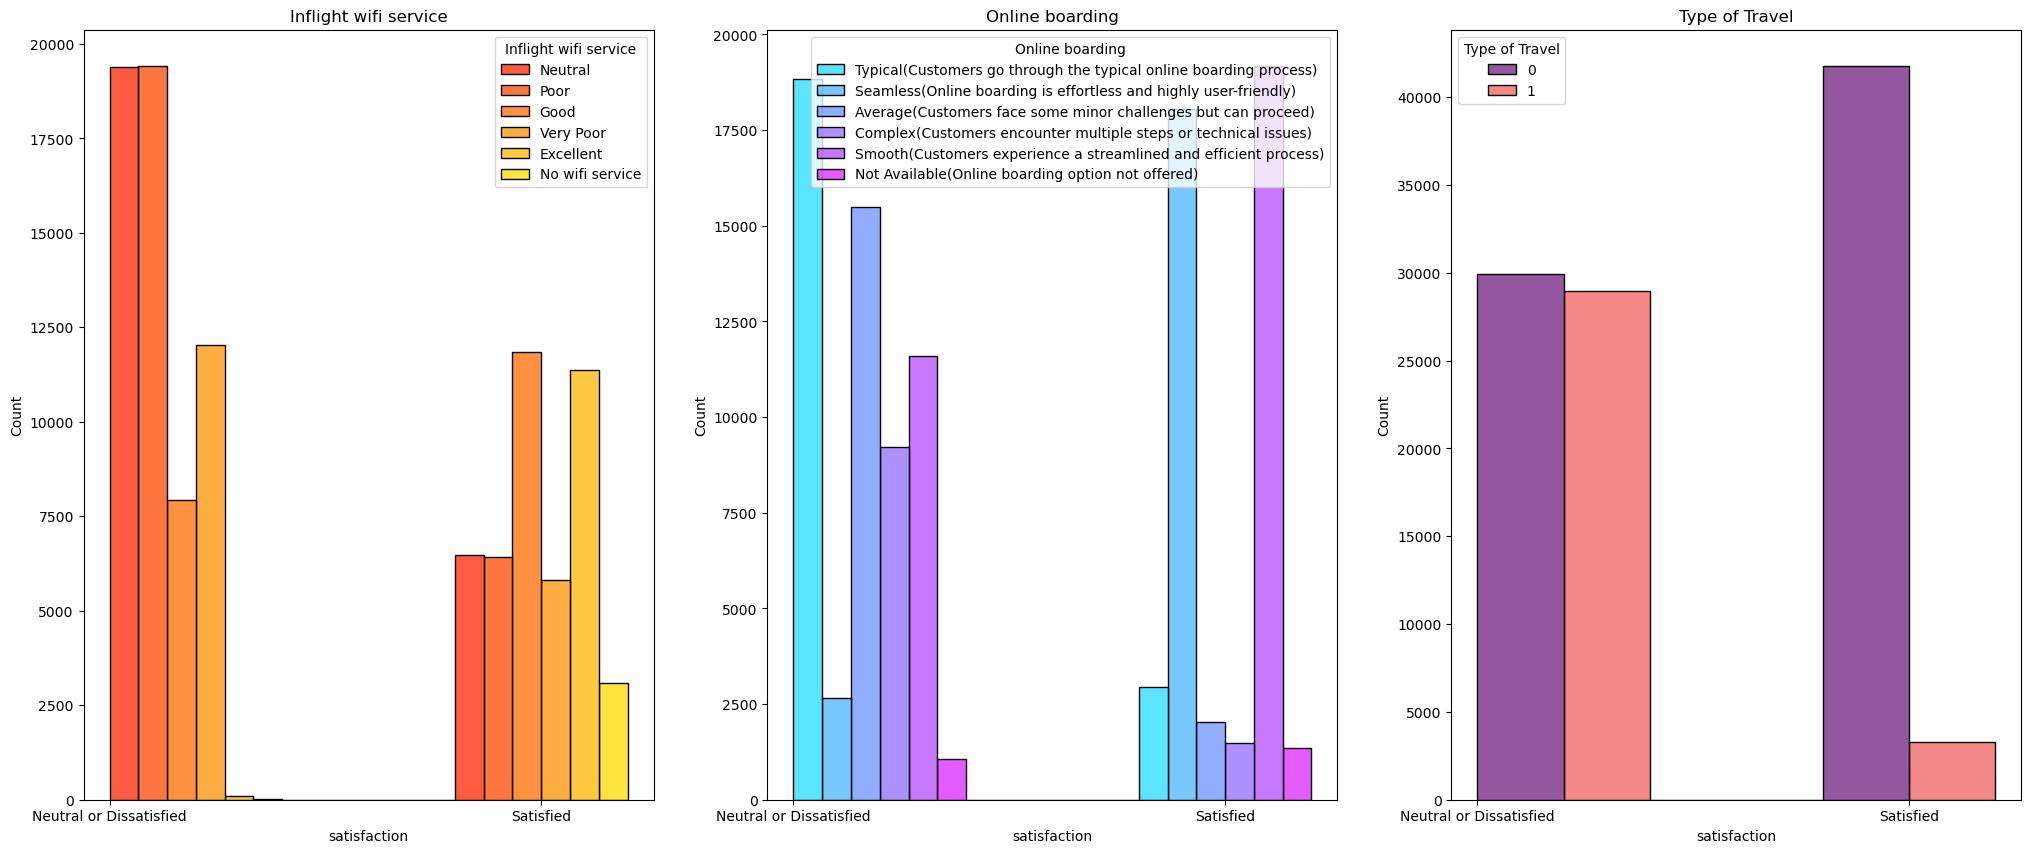

In [267]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns and color palettes
columns = ['Inflight wifi service', 'Online boarding', 'Type of Travel']
pal = ['autumn', 'cool', 'magma']  # 3 color palettes for 3 categorical vars

# Define the mapping for satisfaction
satisfaction_mapping = {1: 'Satisfied', 0: 'Neutral or Dissatisfied'}

# Create subplots with 1 row and 3 columns
fig, axs = plt.subplots(ncols=3, figsize=(25, 10))

for idx, col in enumerate(columns):
    sns.histplot(data=df_cleaned, x='satisfaction', hue=col, palette=pal[idx], ax=axs[idx], binwidth=0.4, multiple='dodge')
    
    # Set x-axis ticks to match the satisfaction levels
    axs[idx].set_xticks([0, 1])
    axs[idx].set_xticklabels(['Neutral or Dissatisfied', 'Satisfied'])
    
    # Set title for each subplot
    axs[idx].set_title(col)

plt.show()


### 2. K means clustering

In [77]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score


In [79]:
numerical_df=df_cleaned[["Age", "Flight Distance", "Departure Delay in Minutes"]]

In [81]:
## exclude satisfaction target column
non_numerical_df=df_cleaned[['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Gender', 'Customer Type', 'Type of Travel', 'Class']]

In [83]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 3 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   Age                         103904 non-null  int64
 1   Flight Distance             103904 non-null  int64
 2   Departure Delay in Minutes  103904 non-null  int64
dtypes: int64(3)
memory usage: 2.4 MB


In [85]:
non_numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   Inflight wifi service              103904 non-null  int64
 1   Departure/Arrival time convenient  103904 non-null  int64
 2   Ease of Online booking             103904 non-null  int64
 3   Gate location                      103904 non-null  int64
 4   Food and drink                     103904 non-null  int64
 5   Online boarding                    103904 non-null  int64
 6   Seat comfort                       103904 non-null  int64
 7   Inflight entertainment             103904 non-null  int64
 8   On-board service                   103904 non-null  int64
 9   Leg room service                   103904 non-null  int64
 10  Baggage handling                   103904 non-null  int64
 11  Checkin service                    103904 non-null  int64
 12  In

#### Scale numerical_df

In [88]:
scaler = StandardScaler()
numerical_df_scaled = scaler.fit_transform(numerical_df)

In [90]:
# StandardScaler returns a numpy-array, so convert it bak to a dataframe:
numerical_df_scaled=pd.DataFrame(numerical_df_scaled,columns=numerical_df.columns)
numerical_df_scaled.head()

,Age,Flight Distance,Departure Delay in Minutes
0,-1.745279,-0.731539,0.266393
1,-0.951360,-0.957184,-0.361375
2,-0.885200,-0.047584,-0.387532
3,-0.951360,-0.629246,-0.099805
4,1.430397,-0.978244,-0.387532


#### Combine both numerical and non numerical df

In [93]:
scaled_df=pd.concat([numerical_df_scaled, non_numerical_df],axis=1)
scaled_df.head()

,Age,Flight Distance,Departure Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Gender,Customer Type,Type of Travel,Class
0,-1.745279,-0.731539,0.266393,3,4,3,1,5,3,5,...,4,3,4,4,5,5,1,0,1,2
1,-0.951360,-0.957184,-0.361375,3,2,3,3,1,3,1,...,1,5,3,1,4,1,1,1,0,0
2,-0.885200,-0.047584,-0.387532,2,2,2,2,5,5,5,...,4,3,4,4,4,5,0,0,0,0
3,-0.951360,-0.629246,-0.099805,2,5,5,5,2,2,2,...,2,5,3,1,4,2,0,0,0,0
4,1.430397,-0.978244,-0.387532,3,3,3,3,4,5,5,...,3,4,4,3,3,3,1,0,0,0


#### Dimensionality reduction - PCA

PCA reduces the dimensionality of the data, which often makes clustering more effective and interpretable. Clustering on PCA-transformed data can reveal patterns and groupings that might not be obvious in the high-dimensional original data.
Reference : https://drlee.io/the-ultimate-step-by-step-guide-to-data-mining-with-pca-and-kmeans-83a2bcfdba7d

In [97]:
pca=PCA(n_components=0.95).fit(scaled_df)
print(pca.n_components_) 

16


In [99]:
# Finally, transform the 21-column "final_df" into 16-column "pca_df":
pca_data=pca.transform(scaled_df)
pca_df=pd.DataFrame(pca_data)

pca_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-2.709897,1.525358,0.318675,1.753343,0.069854,-2.255421,0.349901,1.667435,0.408279,1.269765,-0.085792,0.342008,0.622849,0.033891,-0.985623,0.329740
1,4.253278,-1.819632,-1.144953,-1.866906,-2.410213,0.370448,1.294399,0.558334,-0.836854,0.358644,1.644683,0.006831,-0.709902,-0.719816,-0.497801,-0.089853
2,-2.738744,2.891463,0.967188,-0.375881,0.420073,-1.016190,-0.216841,-0.294292,-0.028398,0.648247,0.243803,0.668113,-0.871645,-0.127283,0.066833,0.263706
3,2.050457,-3.719742,-0.642389,1.178217,-2.028262,1.745315,0.934325,0.095167,-0.563724,0.642497,0.916720,0.449799,-0.812039,-0.438025,-0.860355,1.561832
4,-1.212286,-0.096225,1.048919,-1.239017,0.267810,0.635833,-0.311628,0.797960,-0.608567,-1.235351,0.918271,-0.097440,-1.116507,1.214481,-0.083761,0.071293


#### Elbow Method to find the cluster number - WCSS

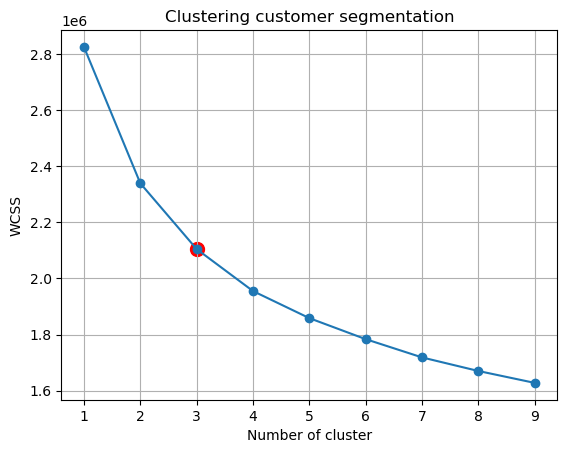

In [108]:
wcss=[]

for i in range (1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 20, random_state = 0)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)
    
# visualize
plt.plot(range(1, 10), wcss, marker='o')
plt.scatter(3, wcss[2], color='red', s=100)
plt.title('Clustering customer segmentation')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


For n_clusters = 2, silhouette score is 0.16469365321101342
For n_clusters = 3, silhouette score is 0.13836353529879675
For n_clusters = 4, silhouette score is 0.13514297785254753
For n_clusters = 5, silhouette score is 0.13183397263052735
For n_clusters = 6, silhouette score is 0.12548924083507068
For n_clusters = 7, silhouette score is 0.11985642732081743
For n_clusters = 8, silhouette score is 0.11634646381703548
For n_clusters = 9, silhouette score is 0.11933947595799836


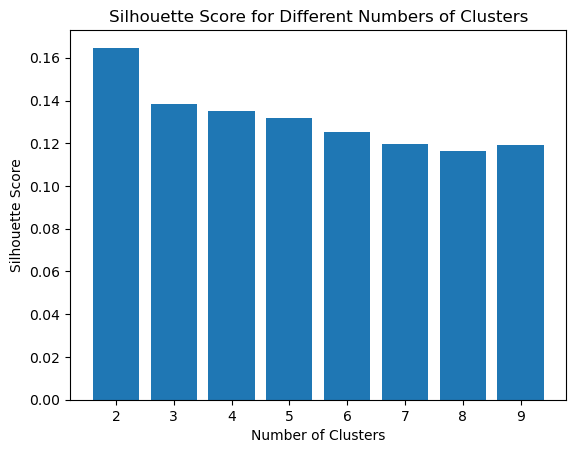

In [110]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming pca_df is your pre-processed DataFrame after PCA

score_list = []
for n_clusters in range(2, 10):
    # Explicitly set n_init to avoid the FutureWarning
    clusterer = KMeans(n_clusters=n_clusters, n_init=10, random_state=42).fit(pca_df)
    preds = clusterer.predict(pca_df)
    centers = clusterer.cluster_centers_

    score = silhouette_score(pca_df, preds, metric='euclidean')
    score_list.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

# Plotting the silhouette scores for each number of clusters
plt.bar(range(2, 10), score_list)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()  # Ensure this line has the correct parenthesis


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, Calinski-Harabasz score is 21583.252701570236


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, Calinski-Harabasz score is 17783.073437890544


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, Calinski-Harabasz score is 15411.502284142427


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, Calinski-Harabasz score is 13506.980979138354


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, Calinski-Harabasz score is 12131.4839768083


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, Calinski-Harabasz score is 11147.385616304415


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, Calinski-Harabasz score is 10261.814883508749


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, Calinski-Harabasz score is 9551.133625132601


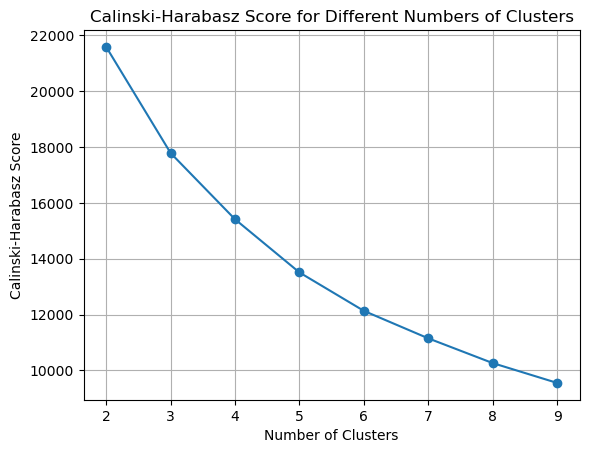

In [113]:
from sklearn.metrics import calinski_harabasz_score

score_list = []
for n_clusters in range(2, 10):
    clusterer = KMeans(n_clusters=n_clusters, random_state=42).fit(pca_df)
    preds = clusterer.predict(pca_df)
    
    score = calinski_harabasz_score(pca_df, preds)
    score_list.append(score)
    print("For n_clusters = {}, Calinski-Harabasz score is {}".format(n_clusters, score))

# Plotting the Calinski-Harabasz scores for each number of clusters
plt.plot(range(2, 10), score_list, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Score for Different Numbers of Clusters')
plt.grid(True)
plt.show()


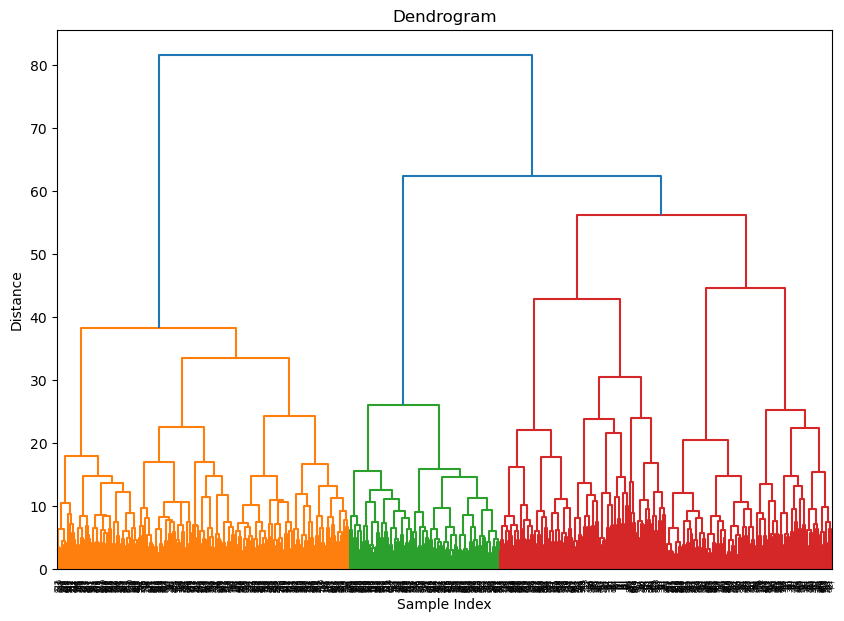

In [117]:
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import matplotlib.pyplot as plt

# Randomly sample a subset of your data
sample_size = 1000  # Adjust this based on your dataset size
random_indices = np.random.choice(pca_df.shape[0], size=sample_size, replace=False)
pca_df_sampled = pca_df.iloc[random_indices]

# Generate the linkage matrix
Z = linkage(pca_df_sampled, 'ward')

# Plot the dendrogram with a distance threshold
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='level', p=10)  # Adjust 'p' based on your preference
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

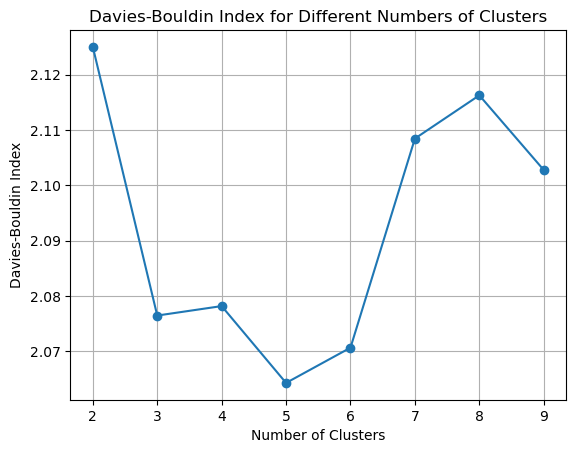

In [119]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

dbi_scores = []
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(pca_df)
    preds = kmeans.predict(pca_df)
    dbi_score = davies_bouldin_score(pca_df, preds)
    dbi_scores.append(dbi_score)

# Plotting the DBI scores for each number of clusters
plt.plot(range(2, 10), dbi_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for Different Numbers of Clusters')
plt.grid(True)
plt.show()


In [121]:
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=300) # empty algorithm with ordered number of clusters
Cluster=kmeans.fit_predict(pca_df) # fit the data
Cluster

array([1, 0, 1, ..., 1, 0, 0], dtype=int32)

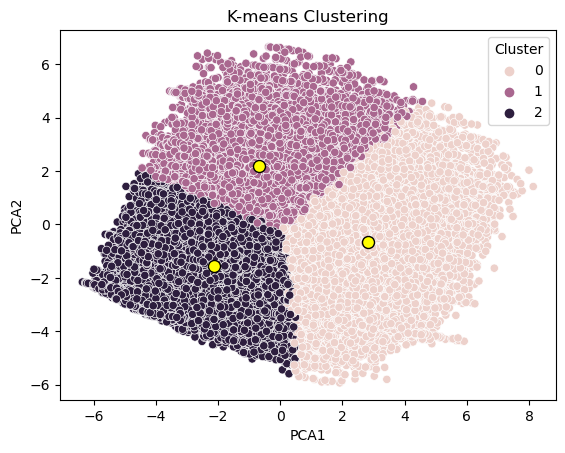

In [123]:
# Fit PCA
pca = PCA(n_components=2)
pca_comp = pca.fit_transform(scaled_df)
df_pca = pd.DataFrame(data=pca_comp, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = Cluster


sns.scatterplot(x="PCA1", y="PCA2", hue=df_pca['Cluster'], data=df_pca)
plt.title('K-means Clustering')


#Calculate and plot the centroids
centroids = kmeans.cluster_centers_
centroids_pca = pca.fit_transform(centroids)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='yellow', marker='.', edgecolors='black', label='Centroids')
plt.show()


### Cluster profiling ¶

Lets add the cluster column to original DF

In [128]:
df_final = df_cleaned.copy()
df_final['Cluster']=Cluster
df_original = df.copy()
df_original['Cluster']=Cluster

In [130]:
df_final.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Gender,Customer Type,Type of Travel,Class,satisfaction,Cluster
0,13,460,3,4,3,1,5,3,5,5,...,4,5,5,25,1,0,1,2,0,1
1,25,235,3,2,3,3,1,3,1,1,...,1,4,1,1,1,1,0,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,4,4,5,0,0,0,0,0,1,1
3,25,562,2,5,5,5,2,2,2,2,...,1,4,2,11,0,0,0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,...,3,3,3,0,1,0,0,0,1,2


#### Distribution of clusters ¶

<Axes: xlabel='Cluster', ylabel='count'>

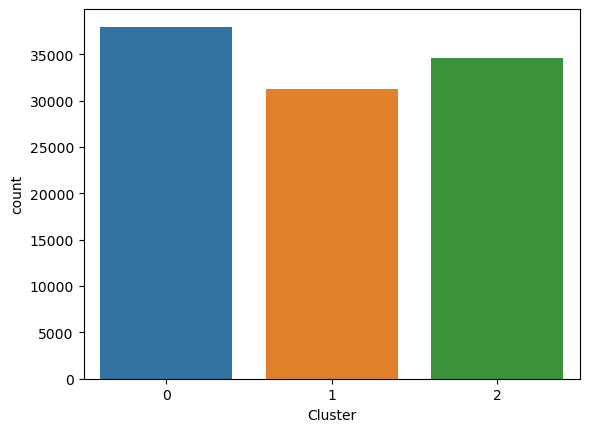

In [133]:
sns.countplot(x="Cluster",data=df_final)

#### Profiles of categorical variables ¶
Let's apply histograms to see how values of each categorical variable are distributed among the clusters:

In [136]:
categorical_columns

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

In [148]:

df_final['satisfaction'] = df['satisfaction'].astype(str)


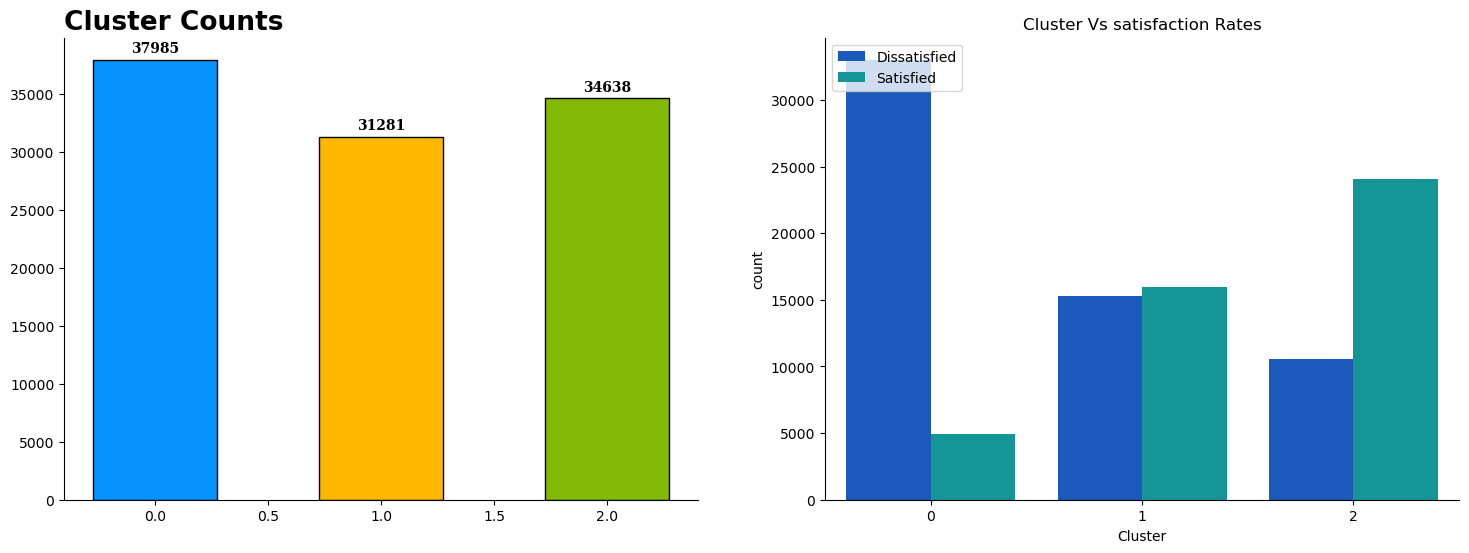

In [150]:
fig, ax = plt.subplots(1,2, figsize=(18, 6))
data_temp = df_final['Cluster'].value_counts().sort_index()
ax[0].bar(data_temp.index, data_temp,
          edgecolor='black', color=['#0693fd', '#ffb800', '#83ba07', '#AC7088']
       ,width=0.55 )
ax[0].set_title('Cluster Counts', loc='left', fontsize=19, fontweight='bold')
for i in data_temp.index:
    ax[0].annotate(f"{data_temp[i]}", 
                   xy=(i, data_temp[i]+1000),
                   va = 'center', ha='center',fontweight='bold', fontfamily='serif',
                   color='black')
for s in ['top', 'right']:
    ax[0].spines[s].set_visible(False)
    
    
sns.countplot(x='Cluster', hue="satisfaction", palette="winter", data=df_final)
sns.despine()
plt.legend(title='', loc='upper left', labels=['Dissatisfied', 'Satisfied'])
plt.title("Cluster Vs satisfaction Rates")
plt.show()

In [152]:
df_final.columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Gender', 'Customer Type',
       'Type of Travel', 'Class', 'satisfaction', 'Cluster'],
      dtype='object')

In [154]:
boarding_labels = {
    0: 'Not Available(Online boarding option not offered)',
    1: 'Complex(Customers encounter multiple steps or technical issues)',
    2: 'Average(Customers face some minor challenges but can proceed)',
    3: 'Typical(Customers go through the typical online boarding process)',
    4: 'Smooth(Customers experience a streamlined and efficient process)',
    5: 'Seamless(Online boarding is effortless and highly user-friendly) '
}
wifi_labels = {
    0: 'No wifi service',
    1: 'Very Poor',
    2: 'Poor',
    3: 'Neutral',
    4: 'Good',
    5: 'Excellent'
}

type_of_travel_labels = {
    0: 'Business Travel',
    1: 'Personal Travel'
}

gender_labels = {
    1: 'Male',
    0: 'Female'
}

customer_type_labels = {
    0: 'Loyal Customer',
    1: 'Disloyal Customer'
}

class_labels = {
    0: 'Business',
    1: 'Eco',
    2: 'Eco Plus'
}
    


In [156]:
columns_to_analyze = ['Inflight wifi service', 'Online boarding', 'Type of Travel']
df_final_1 = df_final.copy()

df_final_1['Online boarding'] = df_final_1['Online boarding'].map(boarding_labels)
df_final_1['Type of Travel'] = df_final_1['Type of Travel'].map(type_of_travel_labels)
df_final_1['Inflight wifi service'] = df_final_1['Inflight wifi service'].map(wifi_labels)
df_final_1['Gender'] = df_final_1['Gender'].map(gender_labels)
df_final_1['Customer Type'] = df_final_1['Customer Type'].map(customer_type_labels)
df_final_1['Class'] = df_final_1['Class'].map(class_labels)

clusters_to_analyze = [0]  # Define which clusters you want to analyze
summary_tables = {cluster: {} for cluster in clusters_to_analyze}  # Initialize a nested dictionary

for cluster in clusters_to_analyze:
    for column in columns_to_analyze:
        # Filter for the current cluster and then group by the column of interest
        cluster_data = df_final_1[df_final_1['Cluster'] == cluster]
        counts = cluster_data.groupby(column).size()
        
        # Calculate percentages
        percentages = counts / counts.sum() * 100
        
        # Combine counts and percentages into a summary DataFrame
        summary_df = pd.DataFrame({'Counts': counts, 'Percentage': percentages})
        
        # Store the summary DataFrame in the nested dictionary
        summary_tables[cluster][column] = summary_df
       
        print(summary_df, "\n")
        

                       Counts  Percentage
Inflight wifi service                    
Excellent                 907    2.387785
Good                     4012   10.562064
Neutral                 11017   29.003554
No wifi service          1112    2.927471
Poor                    13141   34.595235
Very Poor                7796   20.523891 

                                                    Counts  Percentage
Online boarding                                                       
Average(Customers face some minor challenges bu...   10878   28.637620
Complex(Customers encounter multiple steps or t...    6239   16.424905
Not Available(Online boarding option not offered)     1225    3.224957
Seamless(Online boarding is effortless and high...    1662    4.375411
Smooth(Customers experience a streamlined and e...    6569   17.293669
Typical(Customers go through the typical online...   11412   30.043438 

                 Counts  Percentage
Type of Travel                     
Business Travel   22

Inflight wifi service
Excellent            907
Good                4012
Neutral            11017
No wifi service     1112
Poor               13141
Very Poor           7796
Name: count, dtype: int64
Online boarding
0.0     1225
1.0     6239
2.0    10878
3.0    11412
4.0     6569
Name: count, dtype: int64
Type of Travel
Business Travel    22411
Personal Travel    15574
Name: count, dtype: int64


/var/folders/1n/6ys4p5rj6qg8hsk6747ywtyw0000gp/T/ipykernel_80983/2317126760.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data[column] = cluster_data[column].map(online_boarding_mapping)


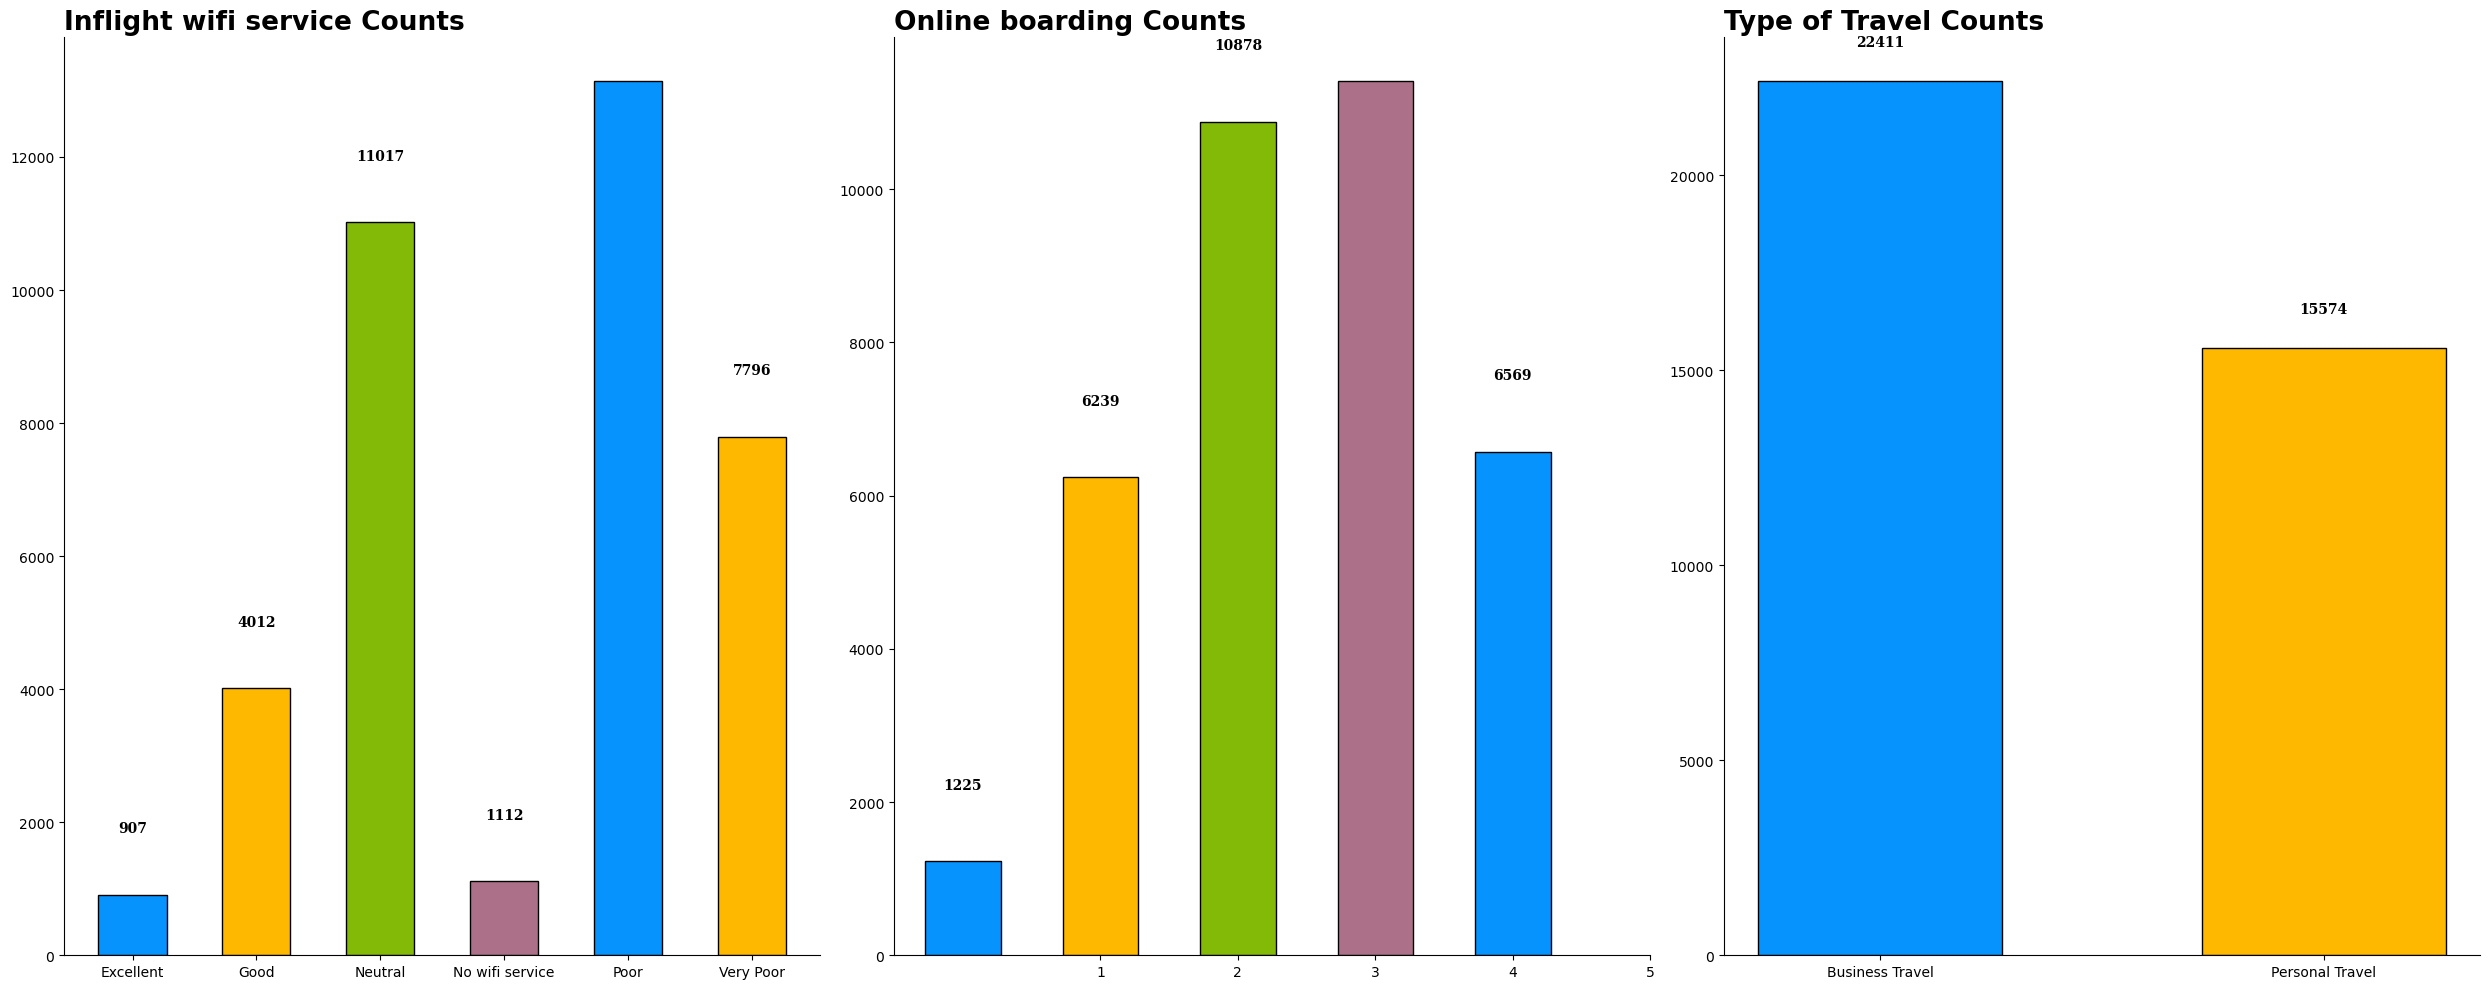

In [158]:
# Define the columns to analyze
columns_to_analyze = ['Inflight wifi service', 'Online boarding', 'Type of Travel']

# Create a mapping for "Online boarding"
online_boarding_mapping={
    'Not Available(Online boarding option not offered)': 0,
    'Complex(Customers encounter multiple steps or technical issues)': 1,
    'Average(Customers face some minor challenges but can proceed)': 2,
    'Typical(Customers go through the typical online boarding process)': 3,
    'Smooth(Customers experience a streamlined and efficient process)': 4,
    'Seamless(Online boarding is effortless and highly user-friendly)': 5
}
# Create subplots with 1 rows and 3 columns
fig,ax=plt.subplots(ncols=3,figsize =(25, 10))

for cluster in clusters_to_analyze:
    for idx, column in enumerate(columns_to_analyze):
        cluster_data = df_final_1[df_final_1['Cluster'] == cluster]
        
        if column == 'Online boarding':
            # Apply the mapping to "Online boarding"
            cluster_data[column] = cluster_data[column].map(online_boarding_mapping)
        
        data_temp = cluster_data[column].value_counts().sort_index()
        print(data_temp)
        
        ax[idx].bar(data_temp.index, data_temp, edgecolor='black', color=['#0693fd', '#ffb800', '#83ba07', '#AC7088'], width=0.55)
        ax[idx].set_title(f'{column} Counts', loc='left', fontsize=19, fontweight='bold')
        
        for i in data_temp.index:
            ax[idx].annotate(f"{data_temp[i]}",
                                  xy=(i, data_temp[i] + 1000),
                                  va='center', ha='center', fontweight='bold', fontfamily='serif',
                                  color='black')
        
        for s in ['top', 'right']:
            ax[idx].spines[s].set_visible(False)
        
        if column == 'Online boarding':
            # Set x-ticks to be 1 through 5 for "Online boarding"
            ax[idx].set_xticks([1, 2, 3, 4, 5])
            ax[idx].set_xticklabels([1, 2, 3, 4, 5])

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


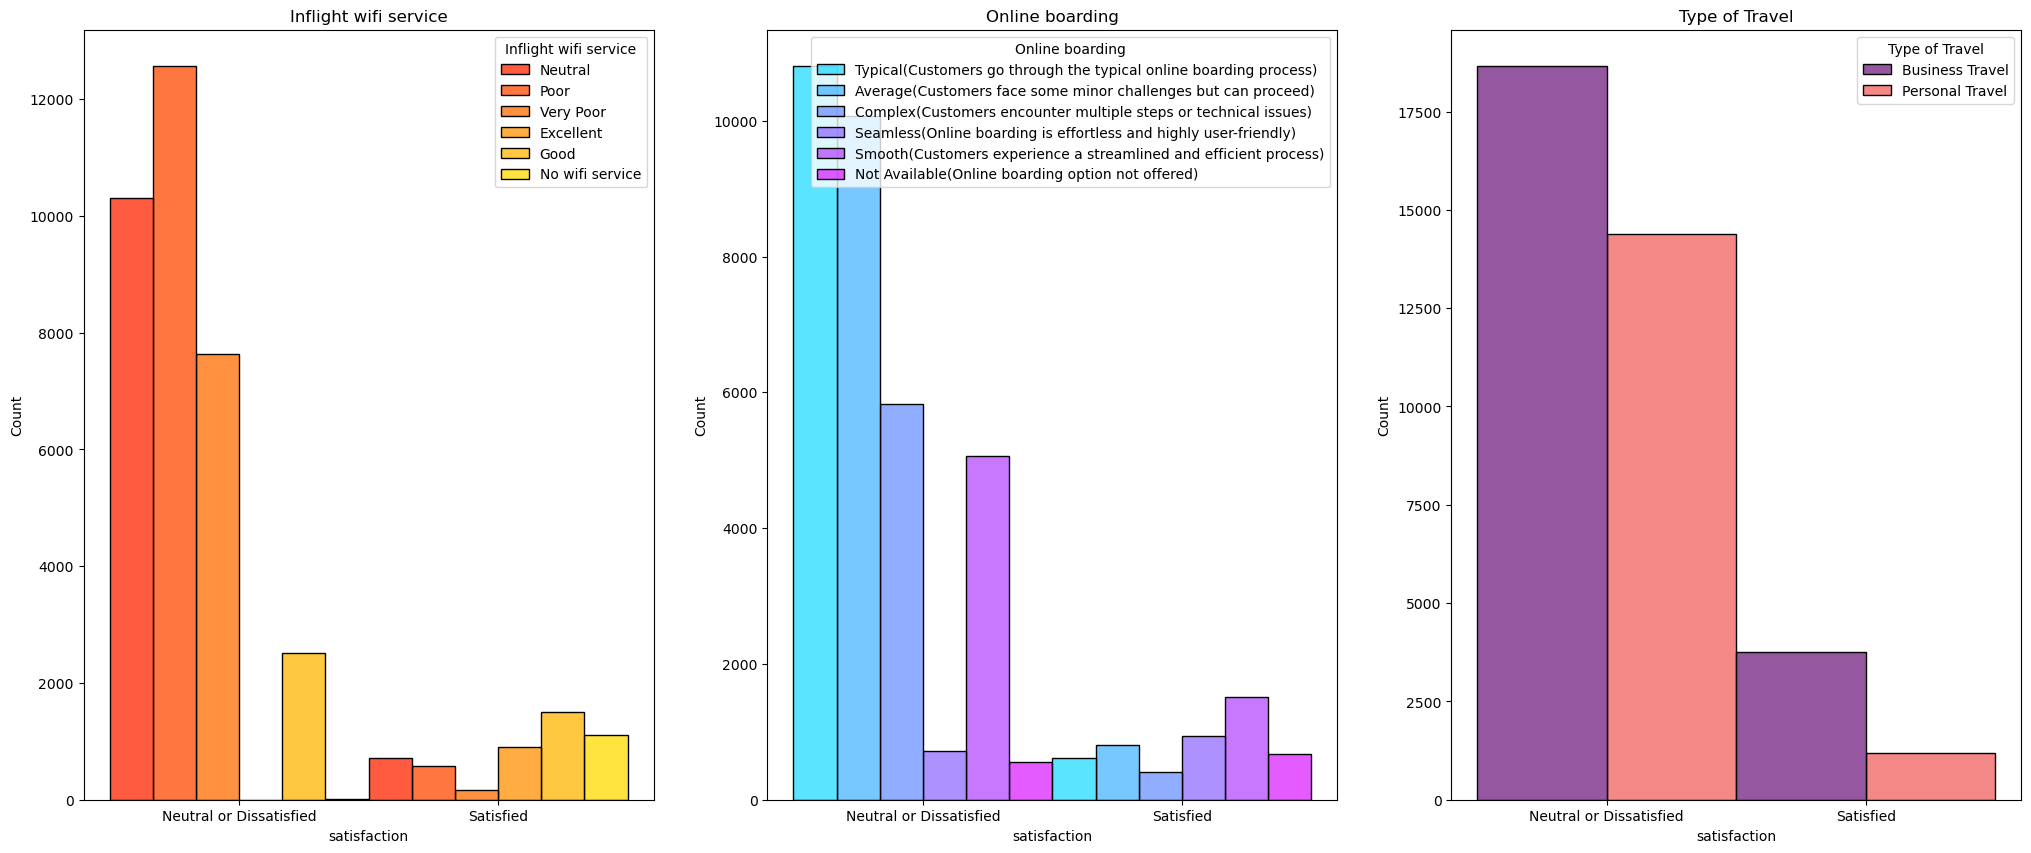

In [160]:
columns = ['Inflight wifi service', 'Online boarding', 'Type of Travel']
pal = ['autumn', 'cool', 'magma']  # 3 color palettes for 3 categorical vars

# Define the mapping for satisfaction
satisfaction_mapping = {1: 'Satisfied', 0: 'Neutral or Dissatisfied'}

# Filter data for Cluster 0
cluster_0_data = df_final_1[df_final_1['Cluster'] == 0]

# Create subplots with 1 row and 3 columns
fig, axs = plt.subplots(ncols=3, figsize=(25, 10))

for idx, col in enumerate(columns):
    sns.histplot(data=cluster_0_data, x='satisfaction', hue=col, palette=pal[idx], ax=axs[idx], binwidth=0.4, multiple='dodge')
    
    # Set x-axis ticks to match the satisfaction levels
    axs[idx].set_xticks([0, 1])
    axs[idx].set_xticklabels(['Neutral or Dissatisfied', 'Satisfied'])
    
    # Set title for each subplot
    axs[idx].set_title(col)

plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

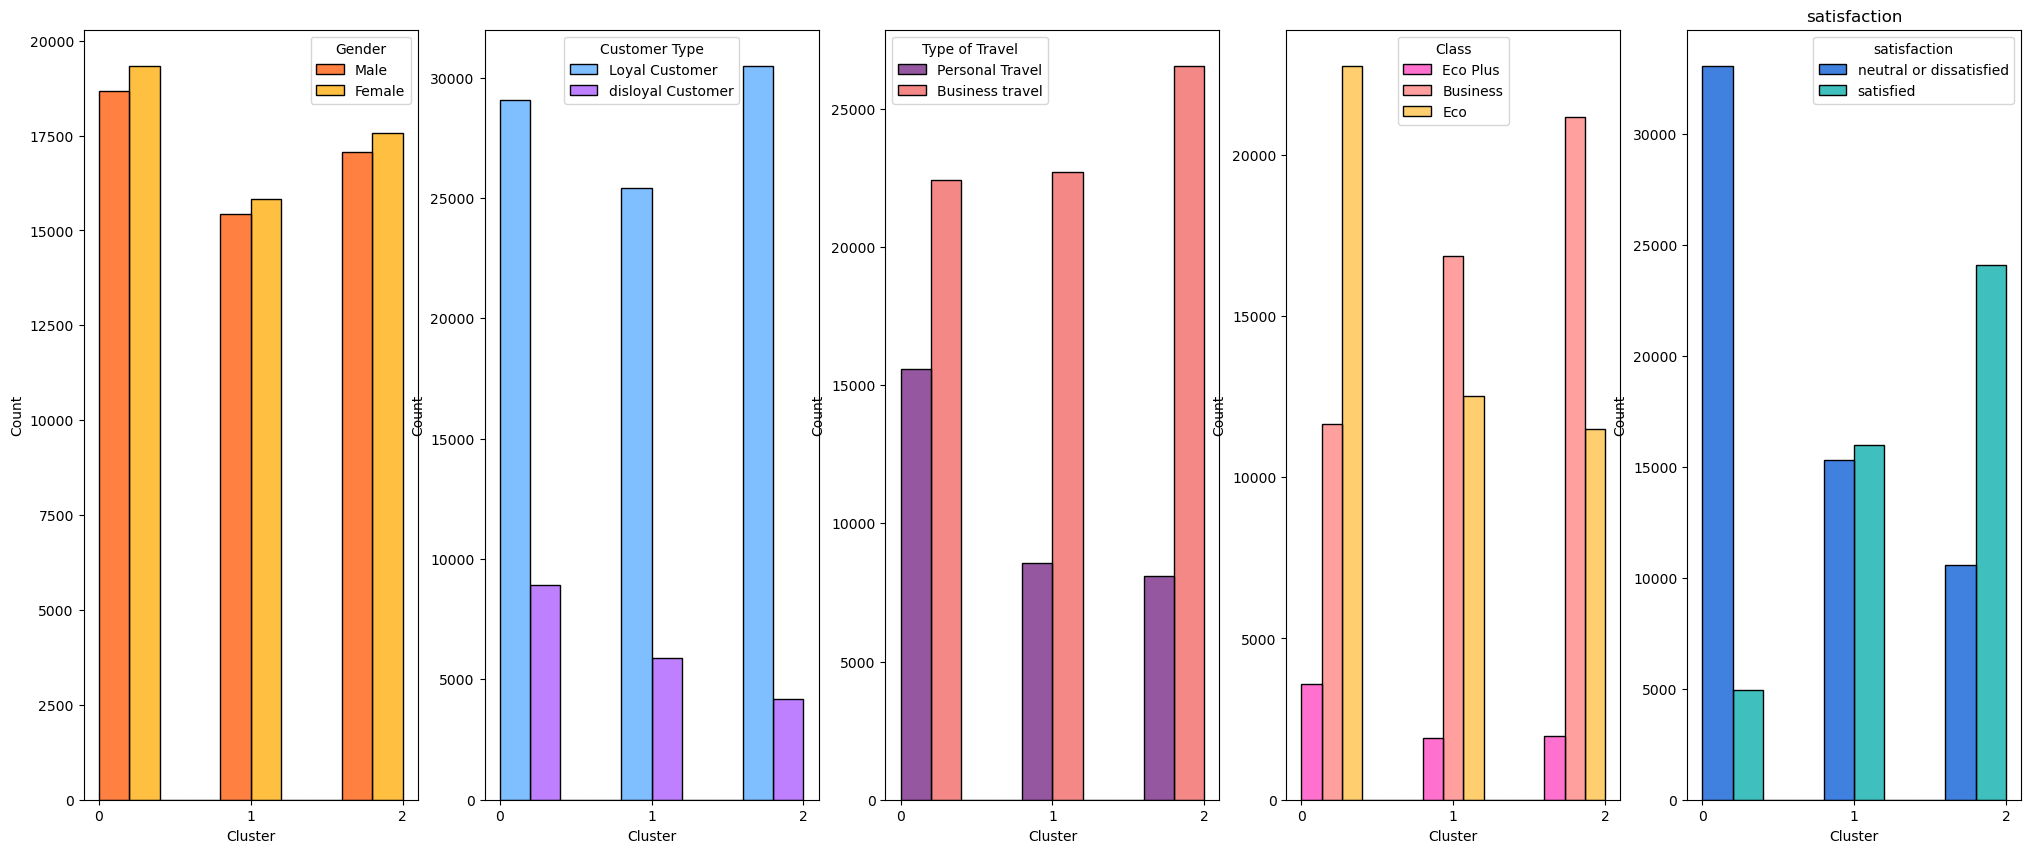

In [162]:
pal=['autumn','cool','magma','spring','winter'] # 5 color palettes for 5 categorical vars
    
fig,axs=plt.subplots(ncols=5,figsize =(25, 10))

for idx,i in enumerate(categorical_columns):
    plt.title(i)
    s = sns.histplot(data=df_original, x='Cluster',hue=i,palette=pal[idx],ax=axs[idx],binwidth=.4, multiple='dodge')
    s.set_xticks(range(3))


1. Gender: Nearly equal number of men/women within each Cluster
2. Customer_Type: In each cluster there are 3-4 times more loyal customers than disloyal ones
3. Type_of_Travel: In each cluster most passengers use the airlines for business trips
there are ~ 2 times more "business travels" than "personal travels" in the Cluster 1 and Cluster 2;
4. Class:
"Eco Plus" seat is the least popular option in all of the Clusters.
Passengers from Cluster 1 and Cluster 2 travel mainly in business class.
Customers from Cluster 0 choose "Eco" the most often. ~ 2 times more than Business class.
5. Satisfaction:
Cluster 2 is the most "satisfied" (~ 70% of satisfied passengers).
Cluster 0 is the least "satisfied" (~ 13% of satisfied passengers).
Cluster 1 has nearly even split between satisfied and not satisfied/neutrual.

#### Average Rating metric 

Analysing each "rating" variable separately, of course, gives more accurate understanding, but is too monotonous. That is why we are going to combine all the "rating" variables of each passenger into one "average_rating" and analyse it instead:

In [168]:
rate_columns=['Inflight wifi service',
           'Departure/Arrival time convenient',
           'Ease of Online booking',
           'Gate location',
           'Food and drink',
           'Online boarding',
           'Seat comfort',
           'Inflight entertainment',
           'On-board service',
           'Leg room service',
           'Baggage handling',
           'Checkin service',
           'Inflight service',
           'Cleanliness'
          ]

df_final["average_rating"]=round(df_final[rate_columns].mean(axis=1), 2)

df_final["average_rating"].head(10)

0    3.86
1    2.29
2    3.71
3    3.00
4    3.50
5    2.50
6    2.79
7    4.50
8    2.07
9    2.93
Name: average_rating, dtype: float64

##### Average rating per cluster

In [190]:
df_r = df_final.groupby("Cluster")["average_rating"].apply("mean")
df_r = round(df_r,2)
df_r

Cluster
0    2.63
1    3.25
2    3.90
Name: average_rating, dtype: float64

##### Satisfaction percentage per cluster

In [192]:
df_s = df_original.groupby('Cluster')['satisfaction'].apply('value_counts')
df_s = df_s.unstack()
df_s['satisfied_proportion'] = (df_s['satisfied'] / (df_s['satisfied'] + df_s['neutral or dissatisfied'])) * 100
df_sp = df_s.groupby("Cluster")["satisfied_proportion"].apply("mean")
df_sp = round(df_sp,2)
df_sp

Cluster
0    13.05
1    51.14
2    69.49
Name: satisfied_proportion, dtype: float64

In [216]:
df1 = pd.merge(df_r, df_sp, on='Cluster')
df1.reset_index(inplace=True)
df1.rename(columns={"index": "Cluster"}, inplace=True)
df1

,Cluster,average_rating,satisfied_proportion
0,0,2.63,13.05
1,1,3.25,51.14
2,2,3.90,69.49


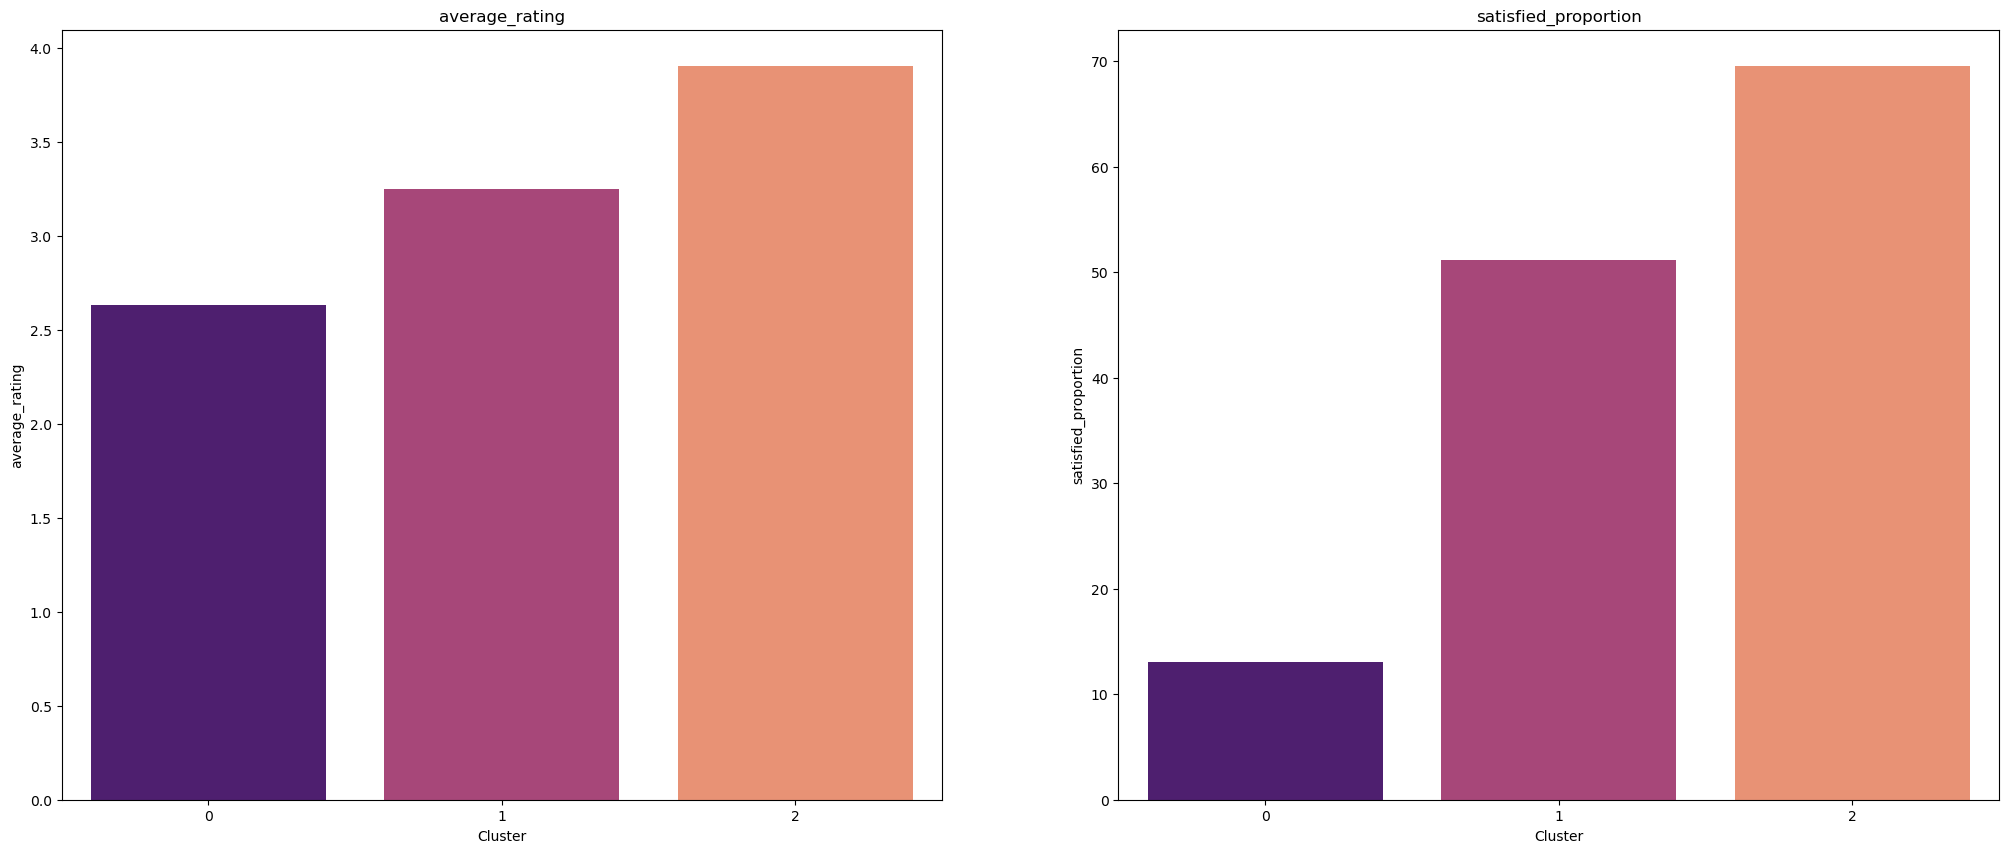

In [240]:


fig, axs = plt.subplots(ncols=2, figsize=(25, 10))

# Loop over the columns for plotting
for idx, col in enumerate(['average_rating', 'satisfied_proportion']):
    sns.barplot(data=df1, x='Cluster', y=col, palette='magma', ax=axs[idx])
    axs[idx].set_title(col)  # Set title for each subplot



From above, It can be seen that average rating is correlated with satisfied proportion